# 섬의 개수

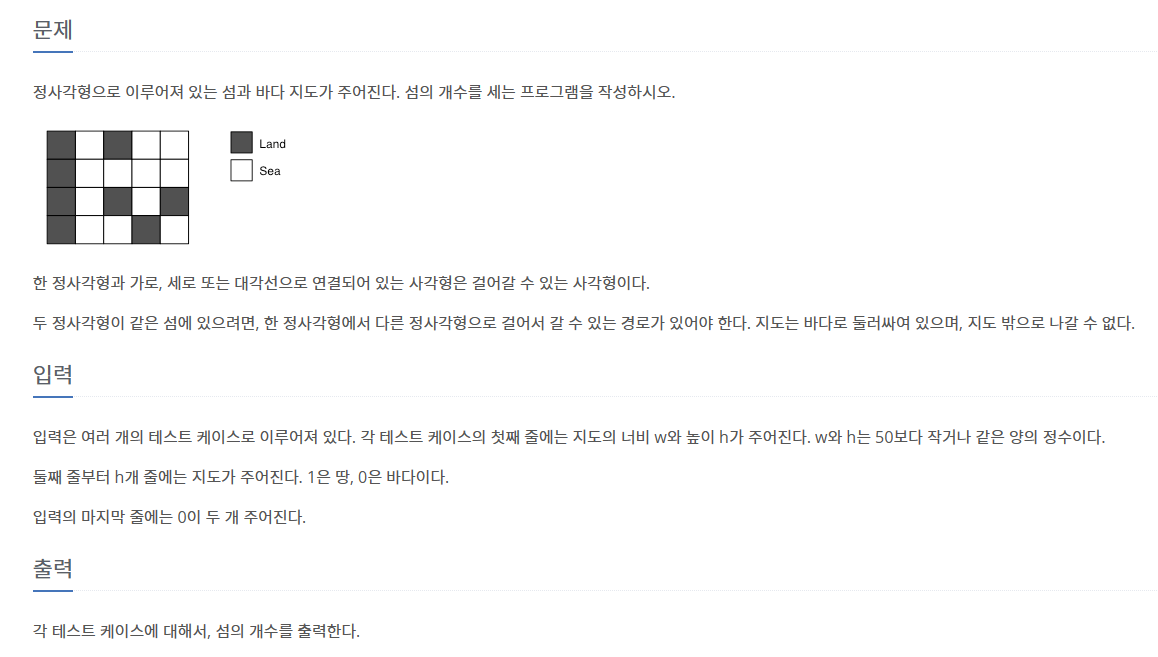

In [1]:
from IPython.display import Image
Image('images/섬1.png')

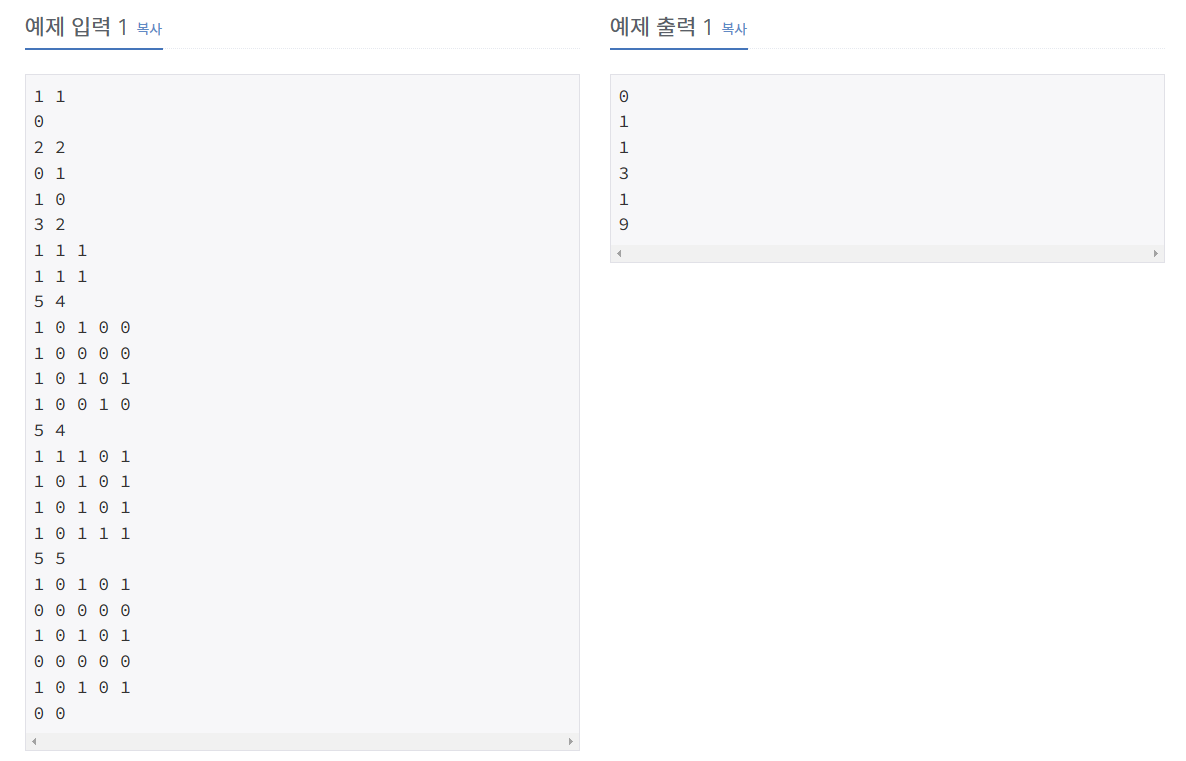

In [2]:
from IPython.display import Image
Image('images/섬2.png')

In [4]:
direction = [(1,0), (0, 1), (1,1), (-1,0), (0,-1), (-1,-1),(1,-1), (-1, 1)] # (3) 방향 정의

def traverse(matrix, i, j): # (4) 순회 함수
    if matrix[i][j]==0: 
        return 
    
    matrix[i][j]=0 
    for d in direction:
        ny = i + d[0]
        nx = j + d[1]
        if nx<0 or ny<0 or nx >= x or ny>=y: 
            continue 
        if matrix[ny][nx]==1: 
            traverse(matrix, ny, nx) 

def countIsland(x, y , matrix): # (2) 섬의 개수
    count = 0
    for i in range(y): 
        for j in range(x): 
            if matrix[i][j] == 1: 
                count += 1 
                traverse(matrix, i, j) 
    return count

while True: # (1) 메인 함수
    x, y = map(int, input().split())
    if x==0 and y==0:
        break
    matrix = [list(map(int, input().split())) for _ in range(y)]
    
    print("섬의갯수: ", countIsland(x, y , matrix))

1 1
0
섬의갯수:  0
2 2
0 1
1 0
섬의갯수:  1
3 2
1 1 1
1 1 1
섬의갯수:  1
5 4
1 0 1 0 0
1 0 0 0 0
1 0 1 0 1
1 0 0 1 0
섬의갯수:  3
0 0


**print 제한때문에 저만큼만 출력하겠음..!**

## (1) 메인 함수
- (왼쪽에서 오른쪽으로 순회할 예정)
- 0 0 이 출력되기 전에 무한 반복 While True
- x가 가로, y가 세로인 매트릭스를 만듬(y번 반복하는)

## (2) countIsland
- 섬의 개수를 세는 함수
- 세로의 길이 만큼
- 그 안의 있는 칸(x)만큼 for문을 돌려줄 예정
- 만약에 그 칸이 섬이다? 그러면 count 하나 늘려주기
- 그리고, 섬을 순회하는 함수를 만들어줌

## (3) direction
- 갈 수 있는 모든 방향을 정의해줌(8가지/상하좌우대각선)

## (4) traverse
- 섬을 순회 // 바다면(matrix[i][j]==0) 아무것도 반환하지 않아도 됨
- 현재 위치에서(d)
- 그 다음 칸의 위치를 ny, nx를 정의 해줌 // ny = i+d[0], nx = i+d[1]
- 근데 만약 지도 밖으로 가게 되면?
- continue를 사용, 다시 위에서 부터 for문 돌리게 하면 됨
- 그 다음 칸이 만약에 섬이다?
- 그대로 방문
- 중복방문(count를 더 할 것)을 피하기 위해 바다로 바꿔서 정의(for문 위에)

### 백준에 제출한 코드

In [ ]:
import sys 
sys.setrecursionlimit(10000)
input = sys.stdin.readline

dx = [0,0,1,-1, 1, 1, -1, -1]
dy = [1,-1,0,0, 1, -1, 1, -1]

def traverse(matrix, i, j): 
    if matrix[i][j]==0: 
        return 
    matrix[i][j]=0 
    for z in range(len(dx)):
        ny = i + dy[z]
        nx = j + dx[z]
        if nx<0 or ny<0 or nx >= x or ny>=y: 
            continue 
        if matrix[ny][nx]==1: 
            traverse(matrix, ny, nx) 

def countIsland(x, y , matrix): 
    count = 0
    for i in range(y): 
        for j in range(x): 
            if matrix[i][j] == 1: 
                count += 1 
                traverse(matrix, i, j) 
    return count

while True: 
    x, y = map(int, input().split())
    if x==0 and y==0:
        break
    matrix = [list(map(int, input().split())) for _ in range(y)]
    print(countIsland(x, y , matrix))

- 런타임 에러가 나서 손을 봤다....
- 파이썬은 재귀함수에 1000으로 제한되어 있어서 이 제한을 풀어줘야된다 (sys.strecursionlimit)을 사용해서 좀 더 올려주었다.
- 그리고 direction으로 한꺼번에 dx, dy를 불러왔었는데, 이 부분을 각각 선언해줬더니 런타임에러가 해결되었다!
- 이 때문에 traverse 함수에 있는 for문도 함께 수정😥